# Beginner Python DataViz for USA Honey Production Dataset

> Honey production data set visualizationThis dataset provides insight into honey production supply and demand in America by state from 1998
> to 2012.
> Dataset -
> The dataset contains numcol, yieldprod, totalprod, stocks , priceperlb, prodvalue, and other useful
> information like Certain states are excluded every year (ex. CT) to avoid disclosing data for individual
> operations.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/honey-production/honeyraw_2003to2007.csv
/kaggle/input/honey-production/honeyproduction.csv
/kaggle/input/honey-production/honeyraw_1998to2002.csv
/kaggle/input/honey-production/honeyraw_2008to2012.csv


Loading the main dataset and renaming the columns

In [2]:
# honeyCols = ['state','n_col', 'yield_per_col', 'total_prod', 'stocks', 'price_per_lb', 'prod_value', 'year']
honey = pd.read_csv("/kaggle/input/honey-production/honeyproduction.csv")
honeyCols = {"state":"state_code", "numcol":"n_colony", "yieldpercol":"yield_per_colony", "totalprod" : "total_production", "stocks":"stocks_in", "priceperlb":"price_per_lb", "prodvalue":"production_value"}
honey.rename(columns = honeyCols, inplace = True)
honey.head()

,state_code,n_colony,yield_per_colony,total_production,stocks_in,price_per_lb,production_value,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
honey.describe(include = "all")

,state_code,n_colony,yield_per_colony,total_production,stocks_in,price_per_lb,production_value,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


Observations from the describe()
1. Count is same across all the variables. No missing values
2. 'state_code' is a categorical variable (nominal). 
3. 'year' is our time variable.
4. 'state_code' may not be understood by everyone. Might be good if we add 'state_name' along with it. 'KY' has the most appearances.
5. 'yield_per_colony' looks like positively skewed.
6. Need to check on 'price_per_lb'. Since this denotes Market Price, need to check if it needs to be inflation adjusted.

In [4]:
state_name_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

honey['state_name'] = honey['state_code'].apply(lambda x: state_name_dict[x])
honey['consumption'] = honey['total_production'] - honey['stocks_in'] 

honey.head()

,state_code,n_colony,yield_per_colony,total_production,stocks_in,price_per_lb,production_value,year,state_name,consumption
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,Alabama,977000.0
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,Arizona,1815000.0
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,Arkansas,1757000.0
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,California,25024000.0
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,Colorado,350000.0


In [5]:
#Reordering the columns
honey = honey[["state_code", "state_name", "n_colony", "yield_per_colony", "total_production", "stocks_in", "consumption", "price_per_lb", "production_value","year"]]
honey.head()

,state_code,state_name,n_colony,yield_per_colony,total_production,stocks_in,consumption,price_per_lb,production_value,year
0,AL,Alabama,16000.0,71,1136000.0,159000.0,977000.0,0.72,818000.0,1998
1,AZ,Arizona,55000.0,60,3300000.0,1485000.0,1815000.0,0.64,2112000.0,1998
2,AR,Arkansas,53000.0,65,3445000.0,1688000.0,1757000.0,0.59,2033000.0,1998
3,CA,California,450000.0,83,37350000.0,12326000.0,25024000.0,0.62,23157000.0,1998
4,CO,Colorado,27000.0,72,1944000.0,1594000.0,350000.0,0.70,1361000.0,1998


In [6]:
#Adjusting for inflation
inflation_rate = {
    1998: 1.454,
    1999: 1.423,
    2000: 1.376,
    2001: 1.339,
    2002: 1.317,
    2003: 1.288,
    2004: 1.255,
    2005: 1.214,
    2006: 1.176,
    2007: 1.143,
    2008: 1.101,
    2009: 1.105,
    2010: 1.087,
    2011: 1.054,
    2012: 1.032
}

inflation_list = ['price_per_lb', 'production_value']

for year in set(honey['year']):
    for item in inflation_list:
        honey.loc[honey['year']==year, item] = inflation_rate[year]*honey.loc[honey['year']==year, item]
        
honey.head()

,state_code,state_name,n_colony,yield_per_colony,total_production,stocks_in,consumption,price_per_lb,production_value,year
0,AL,Alabama,16000.0,71,1136000.0,159000.0,977000.0,1.04688,1189372.0,1998
1,AZ,Arizona,55000.0,60,3300000.0,1485000.0,1815000.0,0.93056,3070848.0,1998
2,AR,Arkansas,53000.0,65,3445000.0,1688000.0,1757000.0,0.85786,2955982.0,1998
3,CA,California,450000.0,83,37350000.0,12326000.0,25024000.0,0.90148,33670278.0,1998
4,CO,Colorado,27000.0,72,1944000.0,1594000.0,350000.0,1.01780,1978894.0,1998


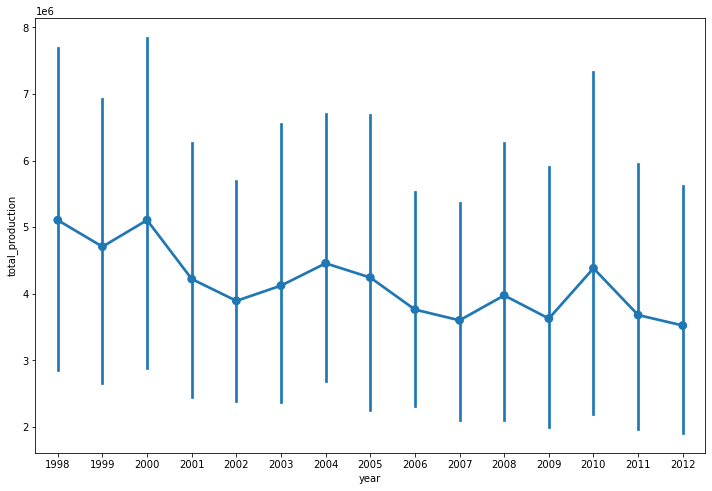

In [7]:
#General Production trend from 1998 to 2012
plt.figure(figsize = (12,8))
sns.pointplot(honey["year"], honey["total_production"])
plt.show()

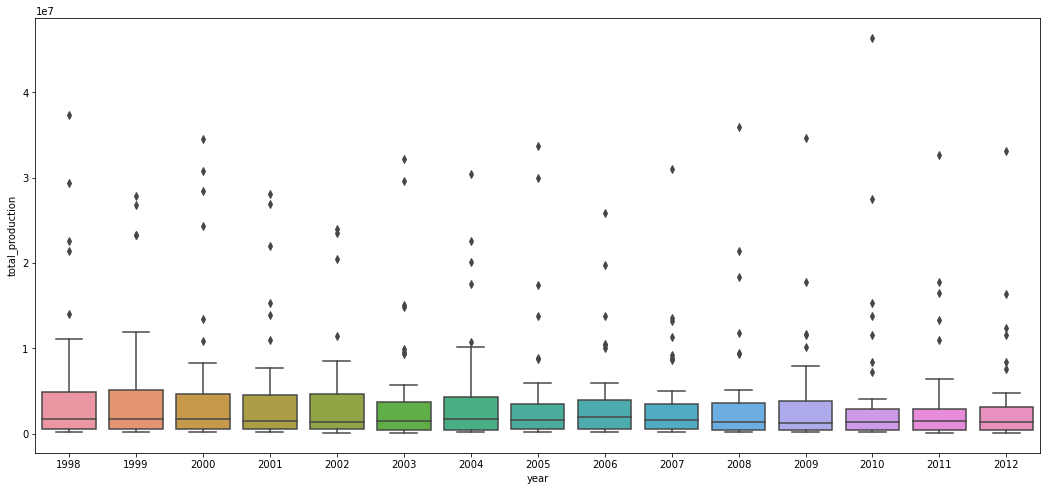

In [8]:
#Check the production trend using boxplots
plt.figure(figsize=(18,8))
sns.boxplot("year", "total_production", data = honey)
plt.show()

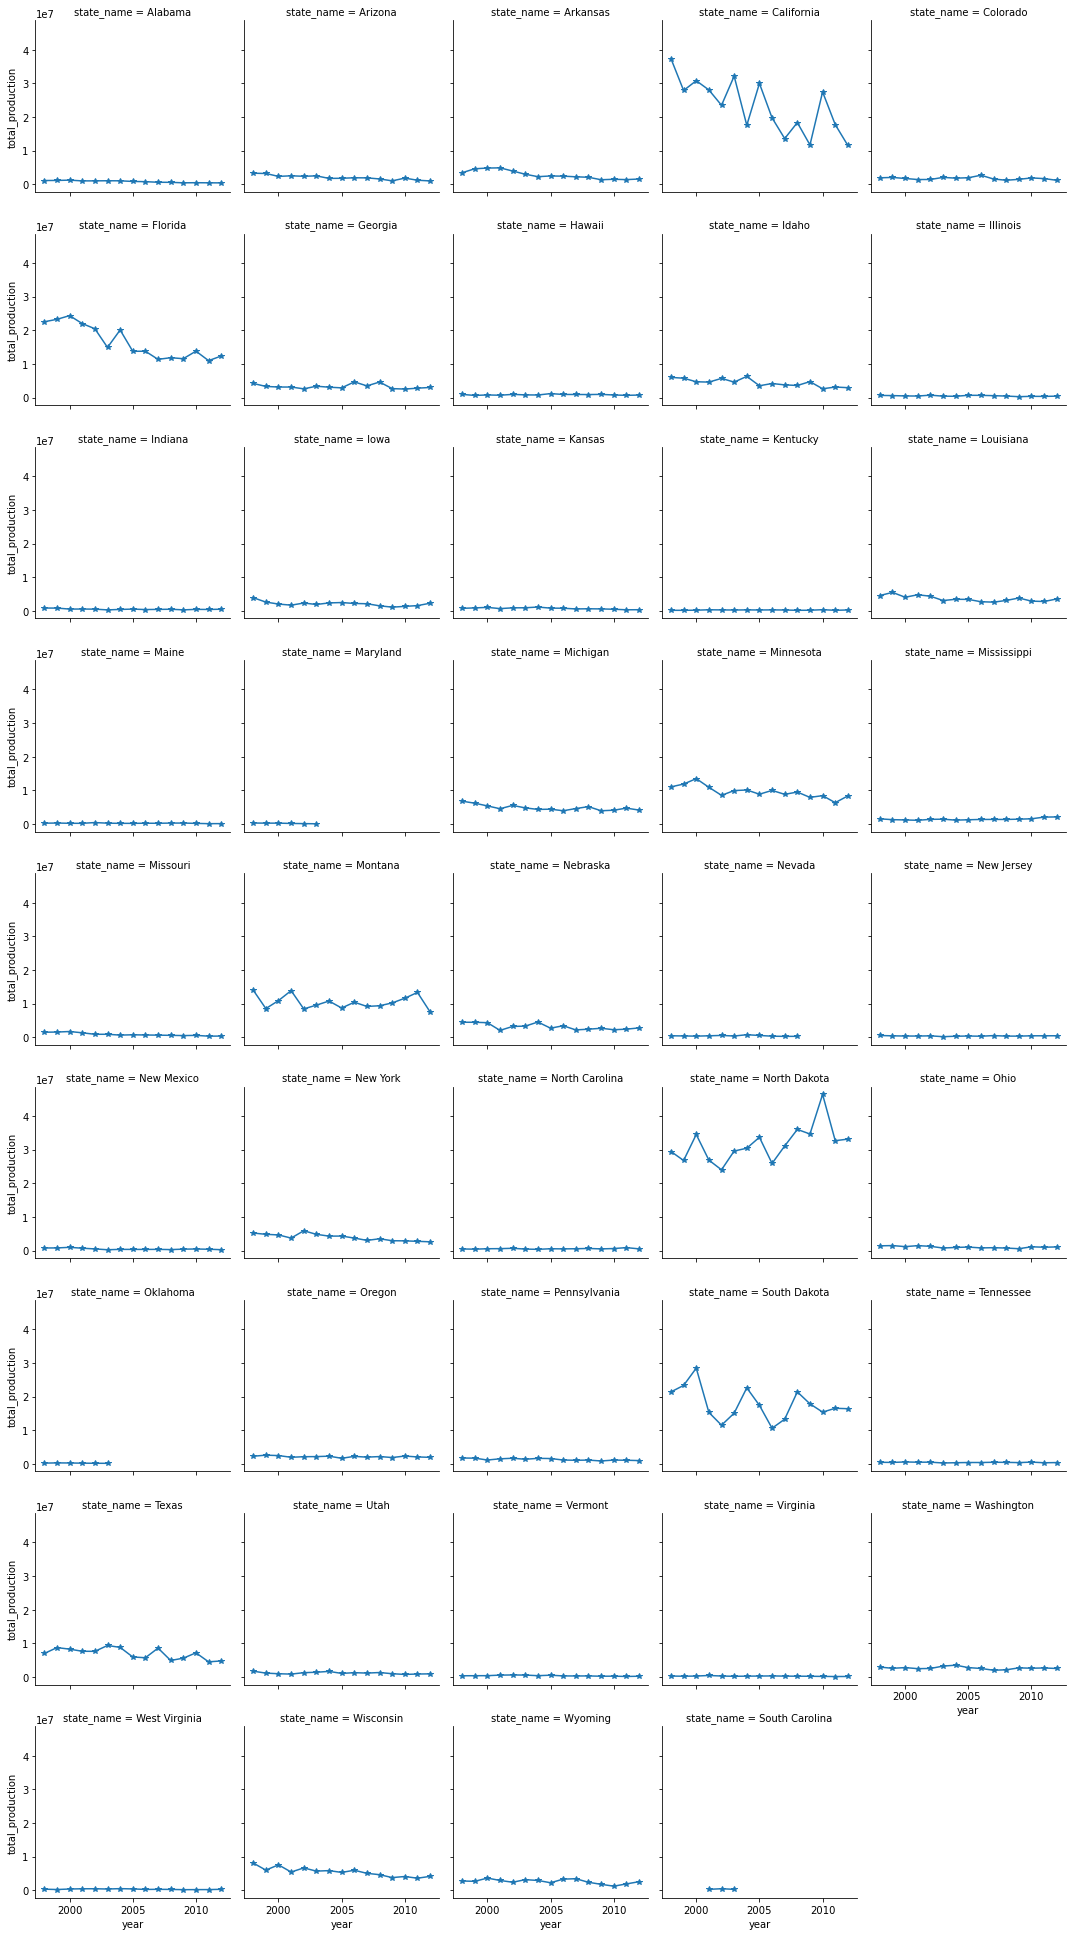

In [9]:
#Production trend for each state
sns.FacetGrid(honey, col = "state_name", col_wrap = 5, height = 3).map(plt.plot, "year", "total_production", marker = "*")

Few observations from the above state-wise production charts
* Oklahoma & South Carolina - No production for the entire year range provided
* California and Florida - Production has declined over the years. 
* Most other states - Production is flat. 

In [10]:
#Checking the correlation between variables
honey_corr = honey[['n_colony', 
              'yield_per_colony', 
              'total_production', 
              'stocks_in', 
              'price_per_lb', 
              'production_value']].corr()

honey_corr

,n_colony,yield_per_colony,total_production,stocks_in,price_per_lb,production_value
n_colony,1.000000,0.243515,0.953594,0.825929,-0.276009,0.933202
yield_per_colony,0.243515,1.000000,0.396252,0.367812,-0.367757,0.311109
total_production,0.953594,0.396252,1.000000,0.878830,-0.300627,0.938726
stocks_in,0.825929,0.367812,0.878830,1.000000,-0.337590,0.766631
price_per_lb,-0.276009,-0.367757,-0.300627,-0.337590,1.000000,-0.166536
production_value,0.933202,0.311109,0.938726,0.766631,-0.166536,1.000000


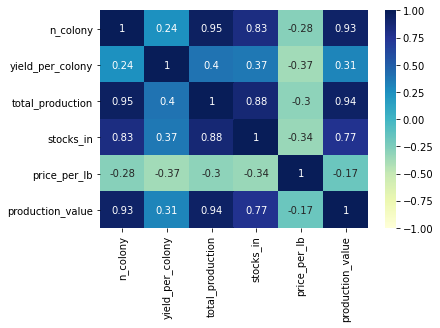

In [11]:
#Visualizing the same in Heatmap()
sns.heatmap(honey_corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

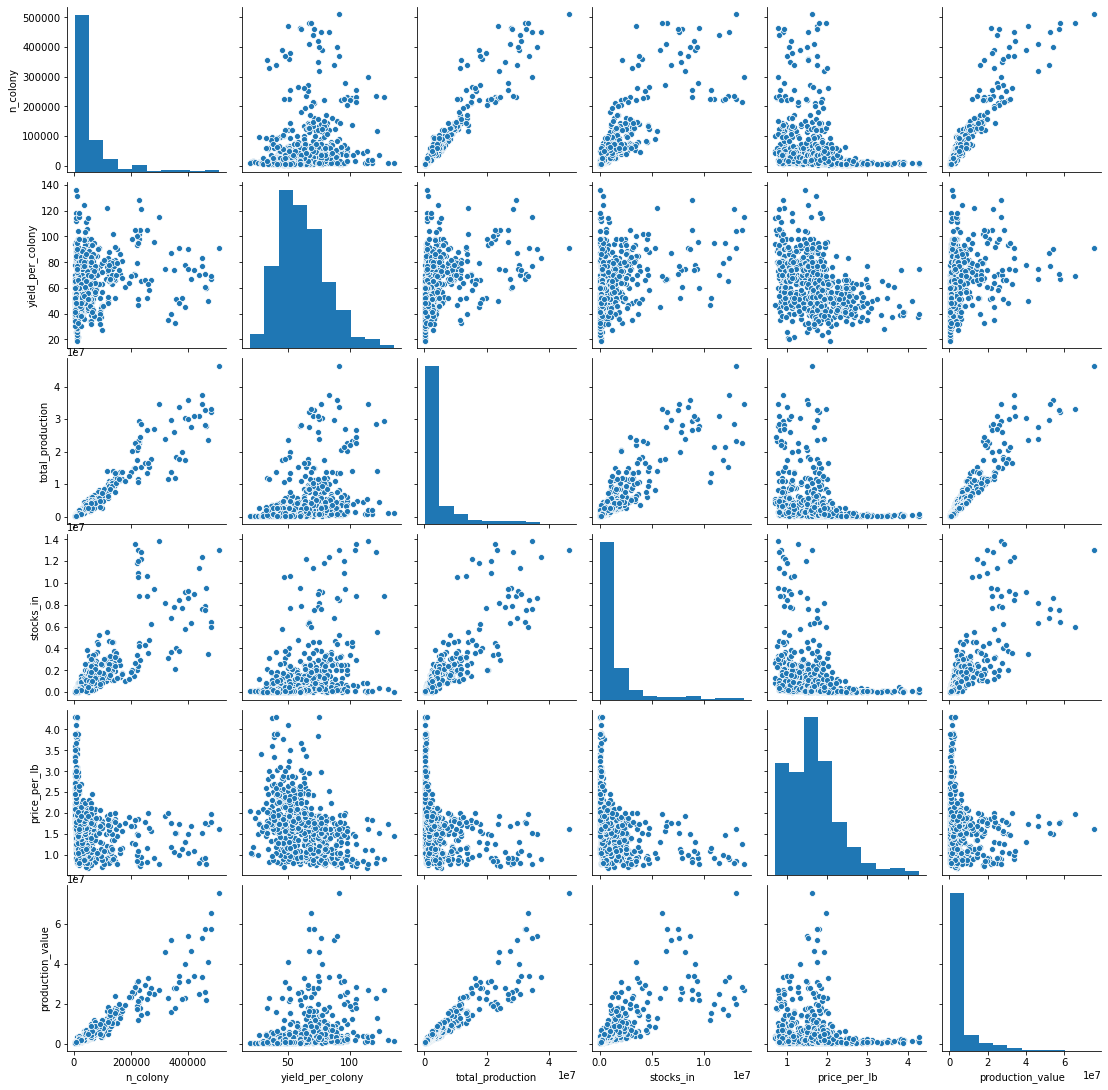

In [12]:
#Visualising the relationship between variables with pairplot
sns.pairplot(honey[['n_colony', 
              'yield_per_colony', 
              'total_production', 
              'stocks_in', 
              'price_per_lb', 
              'production_value']])

**Observations from the correlation matrix:**
1. Number of colonies has shown strong positive correlation with Total Production. 
2. Price per lb has a weak negative correlation with Stocks in hand. 
3. Yield by colony has weak positive correlation with Total Production and Production Value. 

## Plotting the time-series trends 

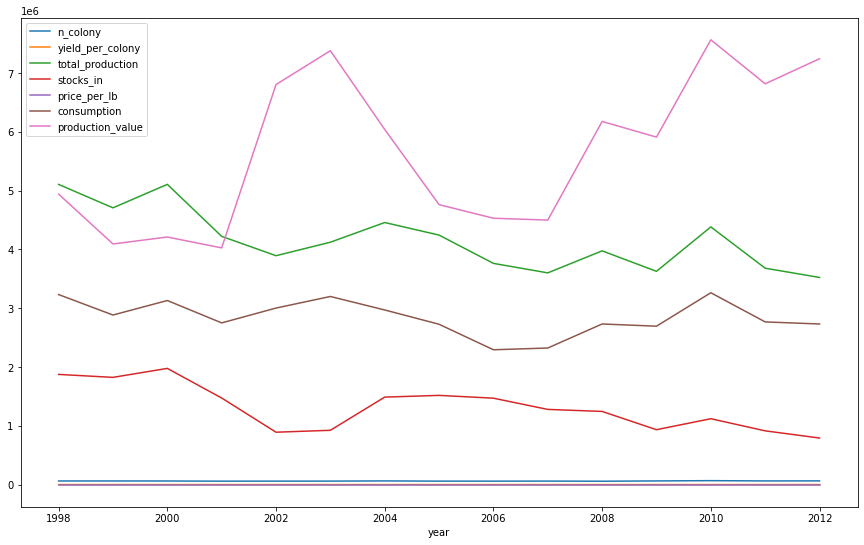

In [33]:
#Plotting the relative trend graphs for Number of Colonies, Yield per colony, Total Production etc. 
honey_prod_over_years = honey.groupby("year").mean()
honey_prod_over_years[['n_colony','yield_per_colony','total_production','stocks_in','price_per_lb','consumption','production_value']].plot(ax=plt.subplots(figsize=(15,9))[1])
plt.show()

Few observations from above line chart:
* Though the Total Production has been slightly declining/flat, the Production Value has been uptrending (prices are inflation adjusted)
* Also, Consumption has largely mimicked the trends in Total Production (largely)

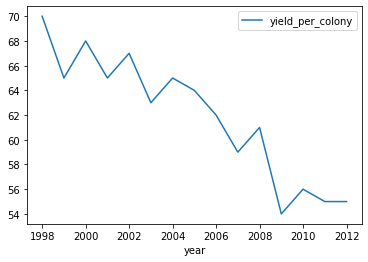

In [19]:
#Grouping the dataset based on years
honey[["year", "yield_per_colony"]].groupby("year").mean().round().plot()
plt.show()

There is a clear downward trend witnessed in the Yield per year over the time period of dataset. 

<Figure size 1296x576 with 0 Axes>

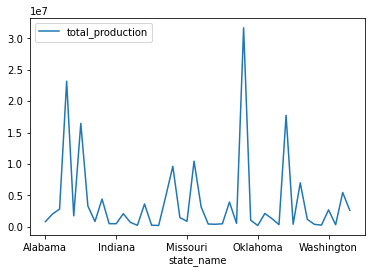

In [24]:
#Grouping the dataset based on states
plt.figure(figsize=(18,8))
honey[["state_name", "total_production"]].groupby("state_name").mean().round().plot()
plt.show()

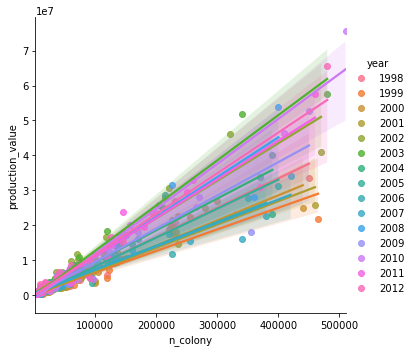

In [27]:
#Checking hypothesis: "More the number of colonies, higher the production value"
sns.lmplot(x = "n_colony", y = "production_value", data = honey, hue = 'year')
plt.show()

In [34]:
# Interactive scatter plot using plotly package
import plotly.express as px
px.scatter(honey, x = 'n_colony', y = 'production_value', animation_frame = 'year', size = 'total_production')